<a href="https://colab.research.google.com/github/Khushibung05/hierarchical_clustering/blob/main/hierarchial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix




from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Path to the dataset (update if needed)
path = '/content/drive/My Drive/Colab Notebooks/all_data.csv'

# Importing the dataset
df= pd.read_csv(path, encoding='latin1',header=None)
df.columns = ["Sentiment", "News Headline"]
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Sentiment                                      News Headline
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...


In [9]:
print(df.columns)


Index(['Sentiment', 'News Headline'], dtype='object')


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

texts = df["News Headline"].astype(str)

vectorizer = TfidfVectorizer(stop_words="english", max_features=1000)
X = vectorizer.fit_transform(texts)

print("TF-IDF Shape:", X.shape)


TF-IDF Shape: (4846, 1000)


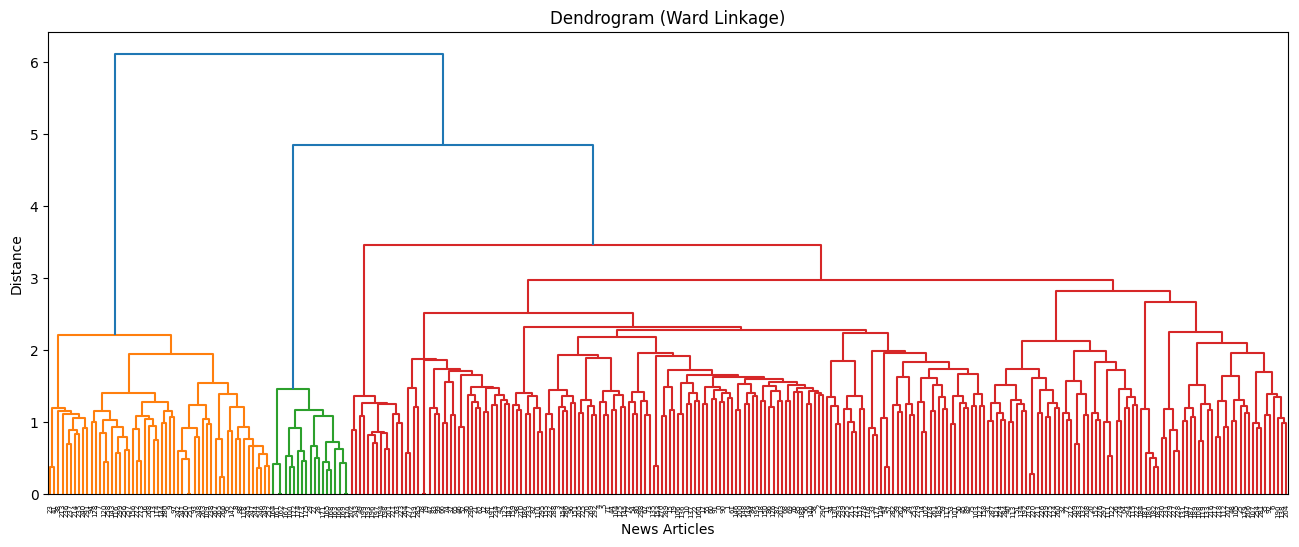

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

subset_size = 300
X_sub = X[:subset_size].toarray()

Z = linkage(X_sub, method="ward")

plt.figure(figsize=(16,6))
dendrogram(Z)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("News Articles")
plt.ylabel("Distance")

plt.axhline(y=8, color="blue", linewidth=5)   # change y value as needed
plt.show()



In [18]:
from sklearn.cluster import AgglomerativeClustering

k = 4   # choose based on dendrogram cut line

model = AgglomerativeClustering(n_clusters=k, linkage="ward")
labels = model.fit_predict(X.toarray())

df["Cluster"] = labels
df.head()


,Sentiment,News Headline,Cluster
0,neutral,"According to Gran , the company has no plans t...",1
1,neutral,Technopolis plans to develop in stages an area...,1
2,negative,The international electronic industry company ...,1
3,positive,With the new production plant the company woul...,0
4,positive,According to the company 's updated strategy f...,1


In [19]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.009293847788361932
